# Predicting Credit Card Fraud
Credit card fraud is one of the leading causes of identify theft around the world. In 2018 alone, over $24 billion were stolen through fraudulent credit card transactions. Financial institutions employ a wide variety of different techniques to prevent fraud, one of the most common being Logistic Regression.

Data Source: https://www.kaggle.com/datasets/ealaxi/paysim1

<img src="c.jpg" alt="drawing" width="1000" height="100" align = "left">

## Case Study Objectives

- Use Logistic Regression and create a predictive model to determine if a transaction is fraudulent or not.
- Discuss your findings.
- What conclusion and recommendations can you derive from your analysis?

### Content
1. Import data and packages
2. Data exploration
 - 1.1 Data inspection
 - 1.2 Fradelent transaction type
 - 1.3 Visualization
3. Feature engineering
 - 3.1 Encoding categorical variables
4. Logistic regression
 - 4.1 Feature selection
 - 4.2 Define, training, normalize, and fitting logistic regression model
5. Model evaluation
 - 5.1 Cofussion matrix
 - 5.2 Accuracy, Precision, Recall, F1 score
 - 5.3 Model test run 
6. Conclusion and recommendation 


`Data Dictionary:`
1. `amount` - amount of the transaction in local currency.
2. `nameOrig` - customer who started the transaction
3. `oldbalanceOrg` - initial balance before the transaction
4. `newbalanceOrig` - new balance after the transaction
5. `nameDest` - customer who is the recipient of the transaction
6. `oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
7. newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
8. `isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

#  1.Import and Load Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings


warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('transactions.csv')

# 2. Data Exploration

 #### 2.1 Data Inspection 
 
 Looking at the dataset, combined with our knowledge of credit card transactions in general, we can see that there are a few interesting columns to look at. We know that the `amount` and transaction `type` is going to be important as well as `oldbalanceOrg` and `oldbalanceDest`.

We have a very unbalance dataset which is only 0.14% cases of fraudelent transactions. Though it's hard to interpret this kind of data, anyway lets start our data exploration.

In [16]:
# show first 3 observations
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0


In [13]:
# percentage of fraudelent transactions
(df['isFraud'].value_counts() / len(df)) * 100

0    99.858999
1     0.141001
Name: isFraud, dtype: float64

#### 2.2 Fraudelent Transaction Type
 
 Fraudelent transactions are from `CASH_OUT` and `TRANSFER` type.

There are a total of 282 fraudelent transactions coming from CASH_OUT and TRANSFER, however the account destination has no recorded amount from looking at `newbalanceDest`

In [20]:
fraud = df[df['isFraud'] == 1]
fraud.groupby('type').type.count()

type
CASH_OUT    132
TRANSFER    150
Name: type, dtype: int64

(0.0, 6000000.0)

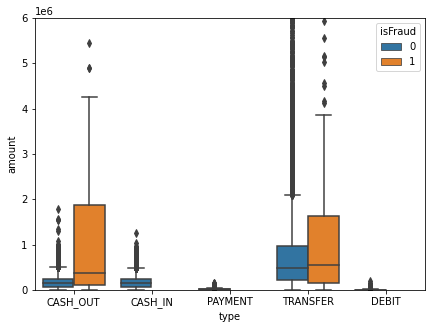

In [21]:
# Visualize
# sns.boxplot(x = "type", y = "amount", hue = "isFraud", palette = "pastel", data = df)
plt.figure(figsize=(7, 5)) 
sns.boxplot(x = 'type', y = 'amount', hue = 'isFraud', data=df)
plt.ylim(0,6000000)

In [22]:
# checking fraud transfer and cash_out at max amount
fraud[fraud['amount'] == fraud.amount.max()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
7923,625,TRANSFER,10000000.0,C1179529142,13020974.53,3020974.53,C2073831661,0.00,0.00,1
75789,160,CASH_OUT,10000000.0,C525906402,10000000.00,0.00,C43869769,2145275.47,12145275.47,1
79016,266,TRANSFER,10000000.0,C1749184895,25494862.93,15494862.93,C1827220106,0.00,0.00,1
91781,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.00,0.00,1
124184,730,CASH_OUT,10000000.0,C1700232450,10000000.00,0.00,C125311108,0.00,10000000.00,1
129621,266,TRANSFER,10000000.0,C2070647495,15494862.93,5494862.93,C1808278362,0.00,0.00,1
164227,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
174987,72,CASH_OUT,10000000.0,C1438388258,10000000.00,0.00,C1089455271,81810.42,10081810.42,1


#### 2.3 Visualization

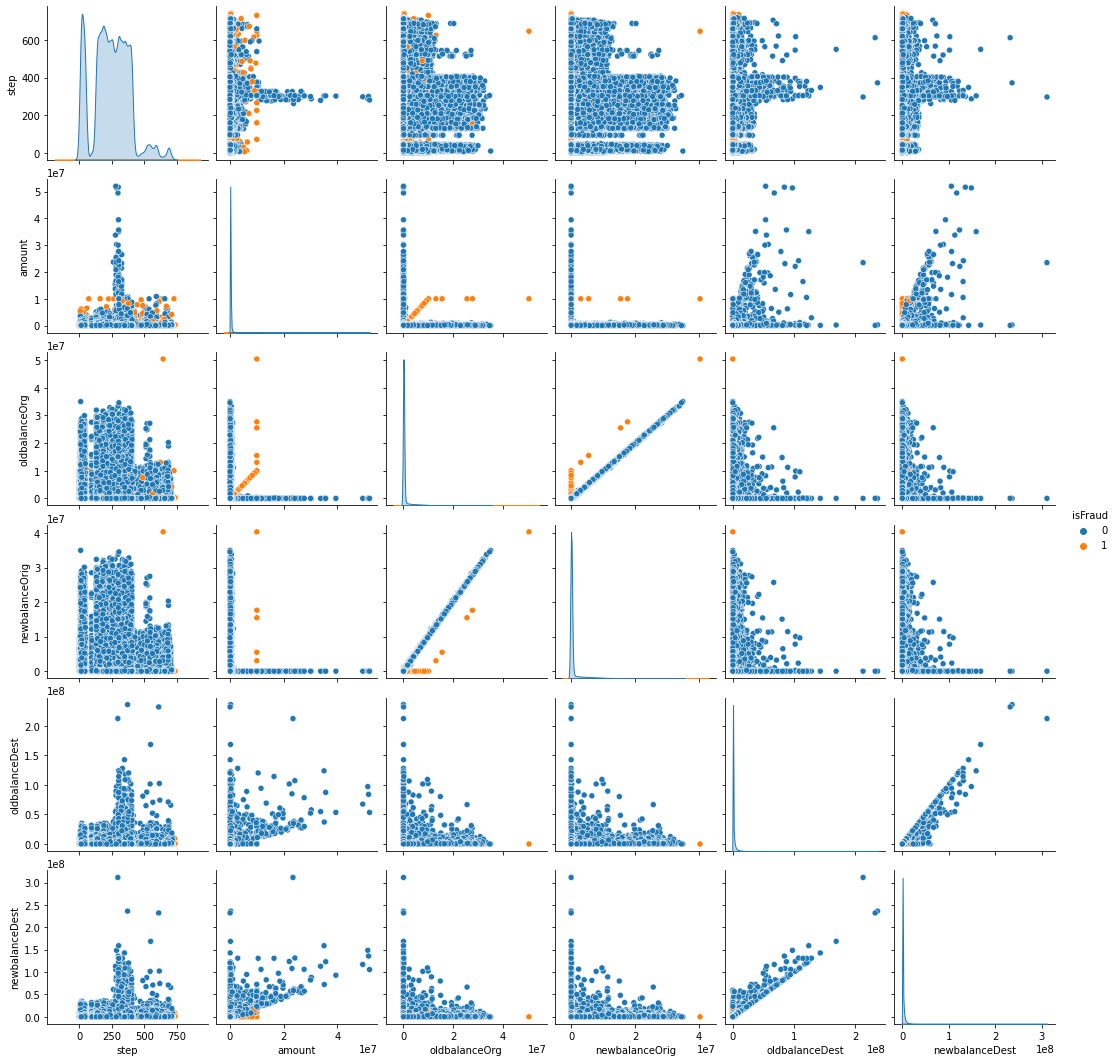

In [23]:
# pairplot all
sns.pairplot(df, hue = 'isFraud')

In [ ]:
# Visualize 
plt.figure(figsize=(15, 5)) 

ax1 = plt.subplot(1,2,1)
sns.scatterplot(df.oldbalanceOrg, df.newbalanceOrig, hue = df.isFraud)

ax2 = plt.subplot(1,2,2)
sns.scatterplot(df.oldbalanceOrg, df.newbalanceOrig, hue = df.isFraud)
plt.title('ZOOM IN')
plt.ylim(0,4)

# ax3 = plt.subplot(1,3,3)
# sns.scatterplot(df.newbalanceDest, df.amount, hue = df.isFraud)
# plt.xlim(0,4)

`oldbalanceorig` has this value then by looking at the `newbalanceorig`, value are at zero. Offender's are likely to drain out victims amount. 

# 3. Feature Engineering

#### 3.1  Encoding Categorical Variables
We have a lot of information about the type of transaction we are looking at. But there are two transactions type that caught my attention. Let's create a column called `isMovement`, which will capture if money moved out of the origin account. This column will have a value of 1 when `type` is either `“CASH_OUT”` or `“TRANSFER”`, and a 0 otherwise.

In [11]:
# Create isMovement field
# Ignore warnings, our code works fine
import warnings
warnings.filterwarnings('ignore')

df['isMovement'] = 0
df['isMovement'][df.type.isin(['CASH_OUT', 'TRANSFER'])] = 1


With financial fraud, another key factor to investigate would be the `difference in value between the origin and destination account`. Our theory, in this case, being that destination accounts with a significantly different value could be suspect of fraud. 

Let’s create a column called `accountDiff` with the absolute difference of the `oldbalanceOrg` and `oldbalanceDest` columns.

In [12]:
df['accountDiff'] = abs(df['oldbalanceDest'] - df['oldbalanceOrg'])
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isMovement,accountDiff
0,8,CASH_OUT,158007.12,C424875646,0.0,0.0,C1298177219,474016.32,1618631.97,0,1,474016.32


# 4. Logistic Regression

#### 4.1 Feature Selection
Work in Progress...

1. What are the assumptions needed for logistic regressions?
2. How can we know that logistic regression is the best fit for prediction? 
3. What is linearity?

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE

In [32]:
k = len(X.columns)

In [33]:
sffs = SFS(lr,
          k_features=k,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)
print('SFFS Result:')
print(sffs.subsets_[k]['feature_names'])
print(sffs.subsets_[k]['avg_score'])

sbfs = SFS(lr,
          k_features=k,
          forward= False,
          floating= True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)
print('\nSBFS Result:')
print(sbfs.subsets_[k]['feature_names'])
print(sbfs.subsets_[k]['avg_score'])

######################################
# RFE
# X_standard so that It will not affect our inital features test if we  rerun the code
X_standard = StandardScaler().fit_transform(X)
rfe = RFE(lr, n_features_to_select=k)
rfe.fit(X_standard,y)
rfe_features = [f for (f, support) in zip(df.iloc[:,:-1], rfe.support_) if support]
print('\nRFE Result:')
print(rfe_features)
print(rfe.score(X_standard,y))

SFFS Result:
('amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isMovement', 'accountDiff')
0.9971499857499287

SBFS Result:
('amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isMovement', 'accountDiff')
0.9971499857499287

RFE Result:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest']
0.9990349951749758


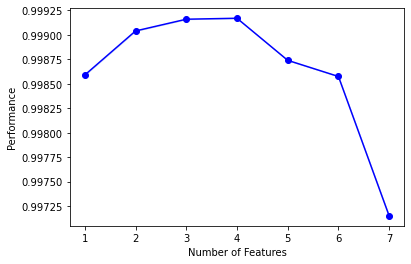

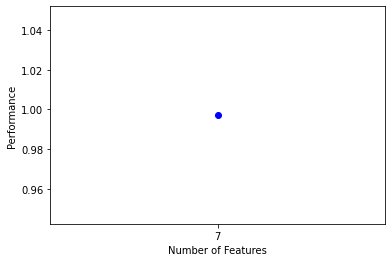

In [34]:
plot_sfs(sffs.get_metric_dict())
plt.show()

plot_sfs(sbfs.get_metric_dict())
plt.show()

In [23]:
# df = df.drop(columns=['isFraud'])
# df = df.drop(columns=['nameOrig'])
# df = df.drop(columns=['nameDest'])

X = df.iloc[:,2:]
X = X.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df.iloc[:,-3]
X


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isMovement,accountDiff
0,158007.12,0.00,0.00,474016.32,1618631.97,1,474016.32
1,457948.30,0.00,0.00,2720411.37,3178359.67,1,2720411.37
2,153602.99,11160428.67,11314031.67,3274930.56,3121327.56,0,7885498.11
3,49555.14,10865.00,0.00,0.00,49555.14,1,10865.00
4,29648.02,0.00,0.00,56933.09,86581.10,1,56933.09
...,...,...,...,...,...,...,...
199994,1274.97,69376.00,68101.03,0.00,0.00,0,69376.00
199995,204041.98,40423.00,0.00,0.00,204041.98,1,40423.00
199996,66378.61,2852895.88,2919274.49,264223.39,197844.78,0,2588672.49
199997,87473.93,1674588.27,1762062.20,245563.25,158089.32,0,1429025.02


In [18]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
# scoreing, how about precion,  recall f1_score?
# sffs = SFS(lr,
#           k_features=7,
#           forward= True,
#           floating= True,
#           scoring='accuracy',
#           cv=0)
# sffs.fit(X, y)

In [ ]:
# sffs.subsets_

In [ ]:
plot_sfs(sffs.get_metric_dict())

In [ ]:
print(sffs.subsets_[3]['feature_names'])
print(sffs.subsets_[3]['avg_score'])

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
# df = df.drop(['type', 'nameDest', 'nameOrig', 'isFraud'], axis=1)
df.head(2)

### Filter
Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default
selector.fit_transform(df)
# selector.get_support(indices=True)
num_cols = list(df.columns[selector.get_support(indices=True)])

df = df[num_cols]
df = df[['isFraud'] + num_cols]

# df.head(3)

#### 4.2 Define, Training, Normalize, and Fitting our Model

While `Feature Selection` topic is still in progess, let's continue with these selected features below;
- `amount`: higher transaction amount can be alarming to fraud
- `isMovement`: whether transaction type is `CASH_OUT` or `TRANSFER`
- `accountDiff`: being that destination accounts with a significantly different value could be suspect of fraud.

In [ ]:
# Define x and y
features = df[['amount','isMovement','accountDiff']]
label = df[['isFraud']]

#### Training data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label,  test_size = 0.30)

#### Normalize the Data
Our features must be in the same scale

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Fitting the model 

In [ ]:
model_lr = LogisticRegression() #LogisticRegression(max_iter=1000) max iteration to converge
model_lr.fit(x_train, y_train)

In [ ]:
# result are all true negatives
model_lr.predict(x_test)

In [ ]:
# all values are lower than 0.5
model_lr.predict_proba(x_test)

## 5. Evaluating our  Model

### 5.1 Confusion Matrix

Lets see how our model perform with the true classes vs. predicted classes

In [ ]:
# y_test, 20% testing data
# y_pred, 20% the predicted classes
model_matrix = confusion_matrix(y_test, y_pred)
model_matrix

In [ ]:
# Visualize
fig, ax = plt.subplots(figsize=(8,5))

# setting variables
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples')

With the given data, It's very rare to have a true possitve result.

#### Checking y_test data

In [ ]:
y_test.groupby('isFraud').isFraud.count()

Examining our y_test (True Classes) we have:
- 59901 True Negative
- 99 True Positve

Our model treat this True Positive as Negative, therefore we miss this 99 (0.17%) True Fraudelent transactions. 

#### Examining y_pred data

Theres no 1 or True positive in our prediction data

In [ ]:
# double checking if are 1's in y_pred
1 in y_pred

### 5.2 Accuracy, Precision, Recall, F1 score
For all of these metrics, a value closer to 1 is better and closer to 0 is worse.

In [ ]:
# Accuracy = (TP + TN)/(TP + FP + TN + FN)
accuracy_score(y_test, y_pred)

In [ ]:
# Precision = TP/(TP + FP)
precision_score(y_test, y_pred)

In [ ]:
# Recall = TP/(TP + FN)
recall_score(y_test, y_pred)

In [ ]:
# F1 score: weighted average of precision and recall
f1_score(y_test, y_pred)

### Test Run
Let's test our model by creating a sample transactions and predict whether fraud or not.

In [ ]:
transaction1 = np.array           ([123456, 1, 123456])
transaction2 = np.array           ([1234567, 1, 1234567])
transaction3 = np.array           ([1, 1, 999999999])
# Testing super high value
transaction4 = np.array           ([99999999999999999999, 1, 9999999999999999999999999999 ])

In [ ]:
# Combine all transactions
all_transactions = np.stack((transaction1,transaction2,transaction3,transaction4))

# Normalize the all_transactions
all_transactions = scaler.transform(all_transactions)

In [ ]:
all_transactions_predict = model_lr.predict(all_transactions)
all_transactions_predict

# 6. Conclusions and Recommendations

Since we have a highly unbalanced data set our Logistic Regression model was unable to predict fraudelent activities. Unless we are going to change our Probabilty threshold or by other techniques. Prescion, Recall and F1 score are at worse even our confusion matrix can't detect True Positves!.

However, in our analysis we have found out that fraudelent transactions are came from 'Money transfer' and 'Cash out' and a single fraud can drain out amount up to $10,000,000.00 so we should be more careful. 

Data collected was not sufficient and should add more detail such as the:
- Transaction location (origin & destination)
- Time zone (origin & destination)


<img src="c1.jpg" alt="drawing" width="1000" height="100" align = "center">